In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import random
from analysis import *
import pandas as pd

In [3]:
info_df = pd.read_csv("../../data/data_info.csv")
strong_imbalance = list(info_df.loc[info_df["imbalance"] <= 0.21, "name"])
weak_imbalance = list(info_df.loc[info_df["imbalance"] > 0.21, "name"])

In [5]:
results = get_all_results('experiment1')
results

,config_id,run_id,name,oversampling,config.pop_size,config.n_iter,config.elitism,config.n_elites,config.init_depth,config.initializer,...,train.roc_auc,train.f1_score,train.precision,train.recall,test.accuracy,test.roc_auc,test.f1_score,test.precision,test.recall,dataset_name
0,1,1,GSGP,True,50,200,True,1,6,rhh,...,0.783226,0.721893,0.696574,0.749123,0.684444,0.759909,0.510345,0.406593,0.685185,blood
1,1,2,GSGP,True,50,200,True,1,6,rhh,...,0.787648,0.719008,0.679688,0.763158,0.697778,0.803011,0.540541,0.425532,0.740741,blood
2,1,3,GSGP,True,50,200,True,1,6,rhh,...,0.790351,0.719064,0.686901,0.754386,0.671111,0.725579,0.493151,0.391304,0.666667,blood
3,1,4,GSGP,True,50,200,True,1,6,rhh,...,0.790966,0.720751,0.702163,0.740351,0.648889,0.745831,0.490323,0.376238,0.703704,blood
4,1,5,GSGP,True,50,200,True,1,6,rhh,...,0.785048,0.712955,0.689034,0.738596,0.631111,0.742690,0.471338,0.359223,0.685185,blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,15,6,SLIM+SIG1,False,50,200,True,1,6,rhh,...,0.868955,0.339286,0.204301,1.000000,0.209877,0.906250,0.346939,0.209877,1.000000,spect
2696,15,7,SLIM+SIG1,False,50,200,True,1,6,rhh,...,0.926742,0.339286,0.204301,1.000000,0.209877,0.837316,0.346939,0.209877,1.000000,spect
2697,15,8,SLIM+SIG1,False,50,200,True,1,6,rhh,...,0.940078,0.339286,0.204301,1.000000,0.222222,0.713235,0.350515,0.212500,1.000000,spect
2698,15,9,SLIM+SIG1,False,50,200,True,1,6,rhh,...,0.898826,0.339286,0.204301,1.000000,0.209877,0.852941,0.346939,0.209877,1.000000,spect


In [7]:
results = results.sort_values('test.f1_score', ascending=False)
results['rank'] = results.groupby('dataset_name')['test.f1_score'].rank(ascending=False)

In [6]:
settings = results[['config_id', 'name', 'oversampling', 'config.fitness_function']].drop_duplicates().sort_values('config_id')
settings['config_settings'] = results['name'] + '_FF(' + results['config.fitness_function'] +')_' + 'OS(' + results['oversampling'].astype(str) +')'
# settings['config_settings'] = (
#     settings['config_settings']
#     .str.replace('True', '_oversampling', regex=False)
#     .str.replace('False', '', regex=False)
# )
settings = settings[['config_id', 'config_settings']]
settings


,config_id,config_settings
0,1,GSGP_FF(sigmoid_rmse)_OS(True)
10,2,GSGP_FF(sigmoid_rmse)_OS(False)
20,3,GSGP_FF(f1_score)_OS(False)
30,4,GSGP_FF(accuracy)_OS(False)
40,5,GSGP_FF(roc_auc)_OS(False)
50,6,SLIM*SIG1_FF(sigmoid_rmse)_OS(True)
60,7,SLIM*SIG1_FF(sigmoid_rmse)_OS(False)
70,8,SLIM*SIG1_FF(f1_score)_OS(False)
80,9,SLIM*SIG1_FF(accuracy)_OS(False)
90,10,SLIM*SIG1_FF(roc_auc)_OS(False)


In [8]:
results = results.merge(settings, on='config_id')
results

,config_id,run_id,name,oversampling,config.pop_size,config.n_iter,config.elitism,config.n_elites,config.init_depth,config.initializer,...,train.precision,train.recall,test.accuracy,test.roc_auc,test.f1_score,test.precision,test.recall,dataset_name,rank,config_settings
0,2,3,GSGP,False,50,200,True,1,6,rhh,...,0.948161,0.893617,0.947864,0.981192,0.932203,0.955598,0.909926,spam,1.0,GSGP_FF(sigmoid_rmse)_OS(False)
1,2,7,GSGP,False,50,200,True,1,6,rhh,...,0.940032,0.914106,0.945692,0.982689,0.929577,0.950096,0.909926,spam,3.0,GSGP_FF(sigmoid_rmse)_OS(False)
2,2,2,GSGP,False,50,200,True,1,6,rhh,...,0.930442,0.895981,0.942795,0.978218,0.925822,0.946257,0.906250,spam,4.0,GSGP_FF(sigmoid_rmse)_OS(False)
3,2,1,GSGP,False,50,200,True,1,6,rhh,...,0.927478,0.907013,0.941347,0.975798,0.924931,0.932710,0.917279,spam,5.5,GSGP_FF(sigmoid_rmse)_OS(False)
4,2,9,GSGP,False,50,200,True,1,6,rhh,...,0.947755,0.914894,0.941347,0.972712,0.924086,0.942639,0.906250,spam,8.0,GSGP_FF(sigmoid_rmse)_OS(False)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,7,8,SLIM*SIG1,False,50,200,True,1,6,rhh,...,0.000000,0.000000,0.866667,0.528846,0.000000,0.000000,0.000000,fertility,116.0,SLIM*SIG1_FF(sigmoid_rmse)_OS(False)
2696,7,7,SLIM*SIG1,False,50,200,True,1,6,rhh,...,0.000000,0.000000,0.866667,0.615385,0.000000,0.000000,0.000000,fertility,116.0,SLIM*SIG1_FF(sigmoid_rmse)_OS(False)
2697,7,6,SLIM*SIG1,False,50,200,True,1,6,rhh,...,0.000000,0.000000,0.866667,0.557692,0.000000,0.000000,0.000000,fertility,116.0,SLIM*SIG1_FF(sigmoid_rmse)_OS(False)
2698,7,4,SLIM*SIG1,False,50,200,True,1,6,rhh,...,0.000000,0.000000,0.866667,0.653846,0.000000,0.000000,0.000000,fertility,116.0,SLIM*SIG1_FF(sigmoid_rmse)_OS(False)


In [10]:
get_aggregated_performance(results, metric= 'test.accuracy', fitness_function='accuracy', agg= 'mean')

config_settings,GSGP_FF(accuracy)_OS(False),SLIM*SIG1_FF(accuracy)_OS(False),SLIM+SIG1_FF(accuracy)_OS(False)
dataset_name,,,
blood,0.768444,0.760000,0.763111
clima,0.906173,0.913580,0.913580
eeg,0.583511,0.557143,0.571273
fertility,0.843333,0.866667,0.846667
gina,0.758457,0.624419,0.745137
hill,0.628571,0.566209,0.621703
ilpd,0.706857,0.713714,0.714857
kc,0.847235,0.844708,0.845024
liver,0.629808,0.600962,0.616346


In [12]:
def adapt_avg_ranking(df, algorithm):
    df['config_settings'] = df['config_settings'].str.split('_FF').str[1]
    df.rename(columns={'avg_rank': algorithm}, inplace=True)
    return df

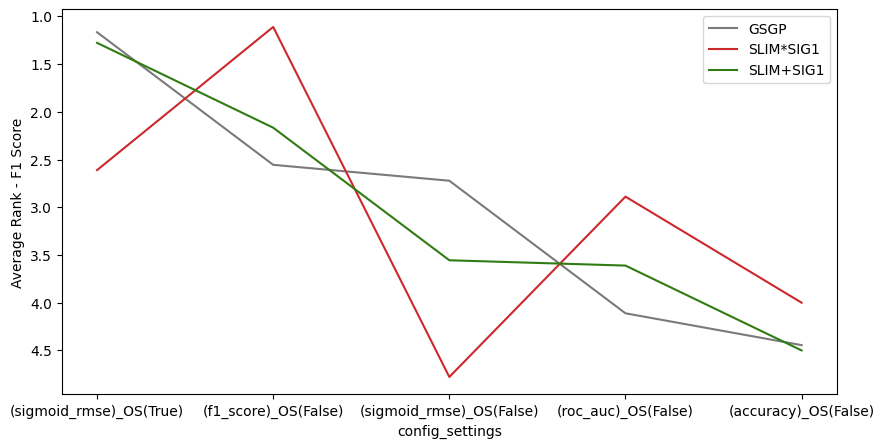

In [13]:
#results = results.loc[results['oversampling'] == False]
gsgp = get_avg_ranking(results, 'test.f1_score', algorithm='GSGP')
mulsig1 = get_avg_ranking(results, 'test.f1_score', algorithm='SLIM*SIG1')
plussig1 = get_avg_ranking(results, 'test.f1_score', algorithm='SLIM+SIG1')
gsgp = adapt_avg_ranking(gsgp, 'GSGP')
mulsig1 = adapt_avg_ranking(mulsig1, 'SLIM*SIG1')
plussig1 = adapt_avg_ranking(plussig1, 'SLIM+SIG1')
merged = gsgp.merge(mulsig1, on='config_settings').merge(plussig1, on='config_settings')
plt.figure(figsize=(10, 5))
sns.lineplot(data=merged, y = 'GSGP', x = 'config_settings', label = 'GSGP', color=colors_dict['GSGP'])
sns.lineplot(data=merged, y = 'SLIM*SIG1', x = 'config_settings', label = 'SLIM*SIG1', color = colors_dict['SLIM*SIG1'])
sns.lineplot(data=merged, y = 'SLIM+SIG1', x = 'config_settings', label = 'SLIM+SIG1', color = colors_dict['SLIM+SIG1'])
plt.ylabel('Average Rank - F1 Score')
plt.gca().invert_yaxis()
plt.show()

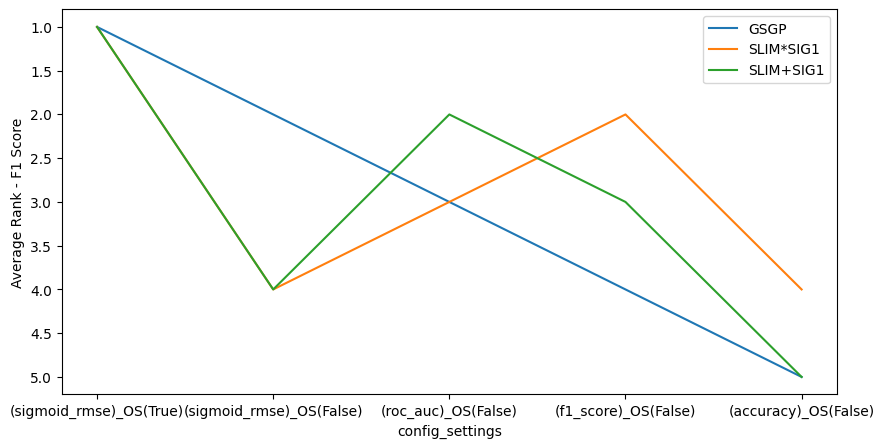

In [ ]:
gsgp = get_avg_ranking(results.loc[results['dataset_name'].isin(strong_imbalance)], 'test.f1_score', algorithm='GSGP')
mulsig1 = get_avg_ranking(results.loc[results['dataset_name'].isin(strong_imbalance)], 'test.f1_score', algorithm='SLIM*SIG1')
plussig1 = get_avg_ranking(results.loc[results['dataset_name'].isin(strong_imbalance)], 'test.f1_score', algorithm='SLIM+SIG1')
gsgp = adapt_avg_ranking(gsgp, 'GSGP')
mulsig1 = adapt_avg_ranking(mulsig1, 'SLIM*SIG1')
plussig1 = adapt_avg_ranking(plussig1, 'SLIM+SIG1')
merged = gsgp.merge(mulsig1, on='config_settings').merge(plussig1, on='config_settings')
plt.figure(figsize=(10, 5))
sns.lineplot(data=merged, y = 'GSGP', x = 'config_settings', label = 'GSGP')
sns.lineplot(data=merged, y = 'SLIM*SIG1', x = 'config_settings', label = 'SLIM*SIG1')
sns.lineplot(data=merged, y = 'SLIM+SIG1', x = 'config_settings', label = 'SLIM+SIG1')
plt.ylabel('Average Rank - F1 Score')
plt.gca().invert_yaxis()
plt.show()

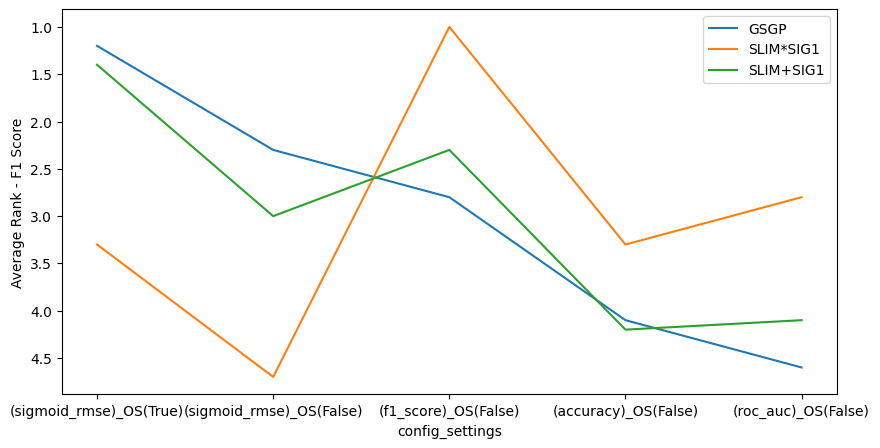

In [14]:
gsgp = get_avg_ranking(results.loc[results['dataset_name'].isin(weak_imbalance)], 'test.f1_score', algorithm='GSGP')
mulsig1 = get_avg_ranking(results.loc[results['dataset_name'].isin(weak_imbalance)], 'test.f1_score', algorithm='SLIM*SIG1')
plussig1 = get_avg_ranking(results.loc[results['dataset_name'].isin(weak_imbalance)], 'test.f1_score', algorithm='SLIM+SIG1')
gsgp = adapt_avg_ranking(gsgp, 'GSGP')
mulsig1 = adapt_avg_ranking(mulsig1, 'SLIM*SIG1')
plussig1 = adapt_avg_ranking(plussig1, 'SLIM+SIG1')
merged = gsgp.merge(mulsig1, on='config_settings').merge(plussig1, on='config_settings')
plt.figure(figsize=(10, 5))
sns.lineplot(data=merged, y = 'GSGP', x = 'config_settings', label = 'GSGP')
sns.lineplot(data=merged, y = 'SLIM*SIG1', x = 'config_settings', label = 'SLIM*SIG1')
sns.lineplot(data=merged, y = 'SLIM+SIG1', x = 'config_settings', label = 'SLIM+SIG1')
plt.ylabel('Average Rank - F1 Score')
plt.gca().invert_yaxis()
plt.show()

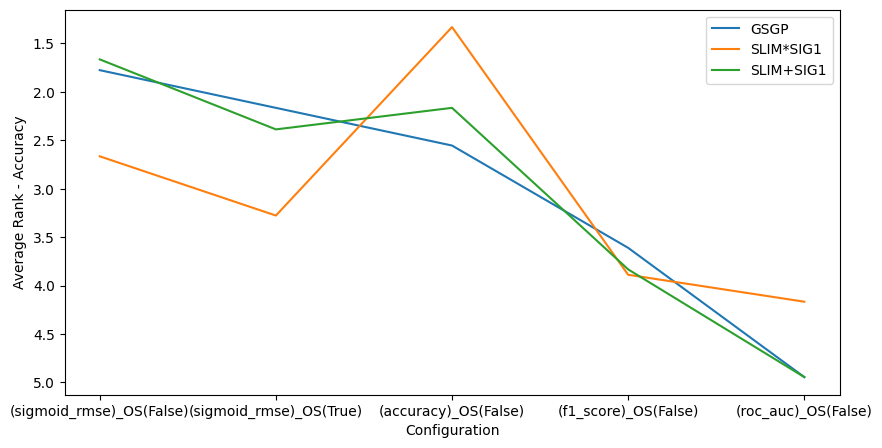

In [15]:
gsgp = get_avg_ranking(results, 'test.accuracy', algorithm='GSGP')
mulsig1 = get_avg_ranking(results, 'test.accuracy', algorithm='SLIM*SIG1')
plussig1 = get_avg_ranking(results, 'test.accuracy', algorithm='SLIM+SIG1')
gsgp = adapt_avg_ranking(gsgp, 'GSGP')
mulsig1 = adapt_avg_ranking(mulsig1, 'SLIM*SIG1')
plussig1 = adapt_avg_ranking(plussig1, 'SLIM+SIG1')
merged = gsgp.merge(mulsig1, on='config_settings').merge(plussig1, on='config_settings')
plt.figure(figsize=(10, 5))
sns.lineplot(data=merged, y = 'GSGP', x = 'config_settings', label = 'GSGP')
sns.lineplot(data=merged, y = 'SLIM*SIG1', x = 'config_settings', label = 'SLIM*SIG1')
sns.lineplot(data=merged, y = 'SLIM+SIG1', x = 'config_settings', label = 'SLIM+SIG1')
plt.ylabel('Average Rank - Accuracy')
plt.xlabel('Configuration')
plt.gca().invert_yaxis()
plt.show()

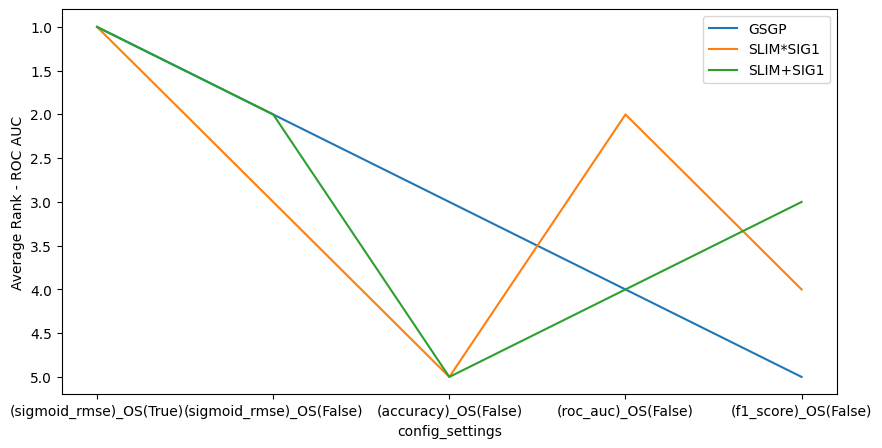

In [ ]:
gsgp = get_avg_ranking(results, 'test.roc_auc', algorithm='GSGP')
mulsig1 = get_avg_ranking(results, 'test.roc_auc', algorithm='SLIM*SIG1')
plussig1 = get_avg_ranking(results, 'test.roc_auc', algorithm='SLIM+SIG1')
gsgp = adapt_avg_ranking(gsgp, 'GSGP')
mulsig1 = adapt_avg_ranking(mulsig1, 'SLIM*SIG1')
plussig1 = adapt_avg_ranking(plussig1, 'SLIM+SIG1')
merged = gsgp.merge(mulsig1, on='config_settings').merge(plussig1, on='config_settings')
plt.figure(figsize=(10, 5))
sns.lineplot(data=merged, y = 'GSGP', x = 'config_settings', label = 'GSGP')
sns.lineplot(data=merged, y = 'SLIM*SIG1', x = 'config_settings', label = 'SLIM*SIG1')
sns.lineplot(data=merged, y = 'SLIM+SIG1', x = 'config_settings', label = 'SLIM+SIG1')
plt.ylabel('Average Rank - ROC AUC')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
get_avg_ranking(results, 'test.f1_score', algorithm='SLIM*SIG1')

,config_settings,avg_rank
0,SLIM*SIG1_FF(sigmoid_rmse)_OS(True),1.0
1,SLIM*SIG1_FF(f1_score)_OS(False),2.0
2,SLIM*SIG1_FF(roc_auc)_OS(False),3.0
3,SLIM*SIG1_FF(accuracy)_OS(False),4.0
4,SLIM*SIG1_FF(sigmoid_rmse)_OS(False),4.0


In [ ]:
get_avg_ranking(results, 'test.f1_score', algorithm='SLIM+SIG1')

,config_settings,avg_rank
0,SLIM+SIG1_FF(sigmoid_rmse)_OS(True),1.0
1,SLIM+SIG1_FF(roc_auc)_OS(False),2.0
2,SLIM+SIG1_FF(f1_score)_OS(False),3.0
3,SLIM+SIG1_FF(sigmoid_rmse)_OS(False),4.0
4,SLIM+SIG1_FF(accuracy)_OS(False),5.0


In [ ]:
get_avg_ranking(results, 'test.f1_score', algorithm='GSGP')

,config_settings,avg_rank
0,GSGP_FF(sigmoid_rmse)_OS(True),1.0
1,GSGP_FF(sigmoid_rmse)_OS(False),2.0
2,GSGP_FF(roc_auc)_OS(False),3.0
3,GSGP_FF(f1_score)_OS(False),4.0
4,GSGP_FF(accuracy)_OS(False),5.0


In [ ]:
get_avg_ranking(results, 'test.accuracy', algorithm='SLIM*SIG1')

,config_settings,avg_rank
0,SLIM*SIG1_FF(accuracy)_OS(False),1.0
1,SLIM*SIG1_FF(sigmoid_rmse)_OS(False),1.0
2,SLIM*SIG1_FF(sigmoid_rmse)_OS(True),3.0
3,SLIM*SIG1_FF(f1_score)_OS(False),4.0
4,SLIM*SIG1_FF(roc_auc)_OS(False),5.0


In [ ]:
get_avg_ranking(results, 'test.accuracy', algorithm='SLIM+SIG1')

,config_settings,avg_rank
0,SLIM+SIG1_FF(sigmoid_rmse)_OS(True),1.0
1,SLIM+SIG1_FF(sigmoid_rmse)_OS(False),2.0
2,SLIM+SIG1_FF(accuracy)_OS(False),3.0
3,SLIM+SIG1_FF(f1_score)_OS(False),4.0
4,SLIM+SIG1_FF(roc_auc)_OS(False),5.0


In [ ]:
get_avg_ranking(results, 'test.roc_auc', algorithm='GSGP')

,config_settings,avg_rank
0,GSGP_FF(sigmoid_rmse)_OS(True),1.0
1,GSGP_FF(sigmoid_rmse)_OS(False),2.0
2,GSGP_FF(accuracy)_OS(False),3.0
3,GSGP_FF(roc_auc)_OS(False),4.0
4,GSGP_FF(f1_score)_OS(False),5.0


In [ ]:
get_avg_ranking(results, 'test.roc_auc', algorithm='SLIM*SIG1')

,config_settings,avg_rank
0,SLIM*SIG1_FF(sigmoid_rmse)_OS(True),1.0
1,SLIM*SIG1_FF(roc_auc)_OS(False),2.0
2,SLIM*SIG1_FF(sigmoid_rmse)_OS(False),3.0
3,SLIM*SIG1_FF(f1_score)_OS(False),4.0
4,SLIM*SIG1_FF(accuracy)_OS(False),5.0


In [ ]:
get_avg_ranking(results, 'test.roc_auc', algorithm='SLIM+SIG1')

,config_settings,avg_rank
0,SLIM+SIG1_FF(sigmoid_rmse)_OS(True),1.0
1,SLIM+SIG1_FF(sigmoid_rmse)_OS(False),2.0
2,SLIM+SIG1_FF(f1_score)_OS(False),3.0
3,SLIM+SIG1_FF(roc_auc)_OS(False),4.0
4,SLIM+SIG1_FF(accuracy)_OS(False),5.0


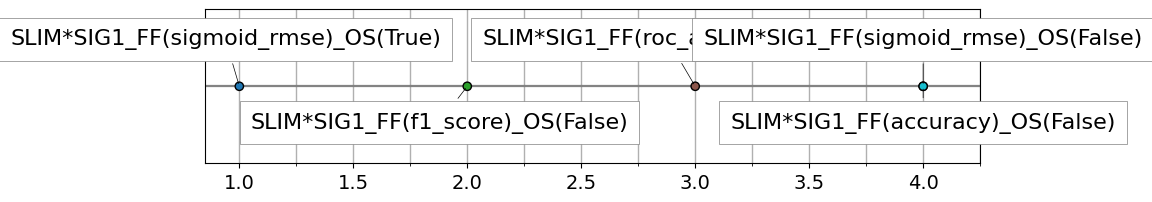

In [ ]:
plot_avg_ranking(get_avg_ranking(results, 'test.f1_score', algorithm='SLIM*SIG1'))

In [ ]:
def round_to_nearest_05(num, lower):
    import math
    if lower:
        return math.floor(num * 2) / 2
    else:
        return math.ceil(num * 2) / 2
    
round_to_nearest_05(2.6, lower=True)

2.5

In [ ]:
logs = get_all_logs('experiment1')
logs

,config_id,algorithm,dataset,seed,generation,elite_train_error,time,population_nodes,elite_test_error,elite_nodes,log_level
0,1,GSGP,blood,1,1,0.490553,0.050787,796.0,0.485953,9,1
1,1,GSGP,blood,1,2,0.465916,0.049350,1222.0,0.454809,15,1
2,1,GSGP,blood,1,3,0.465916,0.051591,1294.0,0.454809,15,1
3,1,GSGP,blood,1,4,0.465916,0.046793,1508.0,0.454809,15,1
4,1,GSGP,blood,1,5,0.465796,0.052315,1742.0,0.455129,21,1
...,...,...,...,...,...,...,...,...,...,...,...
526353,15,SLIM+SIG1,spect,10,196,0.904339,0.041535,6689.0,0.743566,141,1
526354,15,SLIM+SIG1,spect,10,197,0.904339,0.063918,6667.0,0.743566,141,1
526355,15,SLIM+SIG1,spect,10,198,0.904339,0.051015,6713.0,0.743566,141,1
526356,15,SLIM+SIG1,spect,10,199,0.904339,0.048449,6744.0,0.743566,141,1


In [ ]:
ranks = {}
print(get_ranking_significance(get_rankings(results, 'test.accuracy', 'GSGP')))
ranks['test.accuracy']=get_avg_ranking(results, 'test.accuracy', algorithm='GSGP')
ranks['test.accuracy']

0.40600584970983794


,config_settings,avg_rank
0,GSGP_FF(sigmoid_rmse)_OS(True),1.0
1,GSGP_FF(sigmoid_rmse)_OS(False),2.0
2,GSGP_FF(accuracy)_OS(False),3.0
3,GSGP_FF(f1_score)_OS(False),4.0
4,GSGP_FF(roc_auc)_OS(False),5.0


In [ ]:
print(get_ranking_significance(get_rankings(results, 'test.f1_score', 'GSGP')))
ranks['test.f1_score']=get_avg_ranking(results, 'test.f1_score', algorithm='GSGP')
ranks['test.f1_score']

0.40600584970983794


,config_settings,avg_rank
0,GSGP_FF(sigmoid_rmse)_OS(True),1.0
1,GSGP_FF(sigmoid_rmse)_OS(False),2.0
2,GSGP_FF(roc_auc)_OS(False),3.0
3,GSGP_FF(f1_score)_OS(False),4.0
4,GSGP_FF(accuracy)_OS(False),5.0


In [ ]:
print(get_ranking_significance(get_rankings(results, 'test.roc_auc', 'GSGP')))
ranks['test.roc_auc']=get_avg_ranking(results, 'test.roc_auc', algorithm='GSGP')
ranks['test.roc_auc']

0.40600584970983794


,config_settings,avg_rank
0,GSGP_FF(sigmoid_rmse)_OS(True),1.0
1,GSGP_FF(sigmoid_rmse)_OS(False),2.0
2,GSGP_FF(accuracy)_OS(False),3.0
3,GSGP_FF(roc_auc)_OS(False),4.0
4,GSGP_FF(f1_score)_OS(False),5.0


In [ ]:
ranks = get_rankings(results, 'test.accuracy')
ranks[ranks.index.isin(strong_imbalance)]

config_settings,GP_FF(accuracy)_OS(False),GP_FF(f1_score)_OS(False),GP_FF(roc_auc)_OS(False),GP_FF(sigmoid_rmse)_OS(False),GP_FF(sigmoid_rmse)_OS(True),GSGP_FF(accuracy)_OS(False),GSGP_FF(f1_score)_OS(False),GSGP_FF(roc_auc)_OS(False),GSGP_FF(sigmoid_rmse)_OS(False),GSGP_FF(sigmoid_rmse)_OS(True),SLIM*SIG1_FF(accuracy)_OS(False),SLIM*SIG1_FF(f1_score)_OS(False),SLIM*SIG1_FF(roc_auc)_OS(False),SLIM*SIG1_FF(sigmoid_rmse)_OS(False),SLIM*SIG1_FF(sigmoid_rmse)_OS(True),SLIM+SIG1_FF(accuracy)_OS(False),SLIM+SIG1_FF(f1_score)_OS(False),SLIM+SIG1_FF(roc_auc)_OS(False),SLIM+SIG1_FF(sigmoid_rmse)_OS(False),SLIM+SIG1_FF(sigmoid_rmse)_OS(True)
dataset_name,,,,,,,,,,,,,,,,,,,,
fertility,8.0,13.0,17.0,11.0,2.0,10.0,12.0,20.0,8.0,1.0,3.0,16.0,18.0,3.0,15.0,7.0,13.0,19.0,6.0,5.0
pc3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scene,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ranks_strong_imbalance = ranks['test.f1_score'].loc[ranks['test.f1_score']['dataset_name'].isin(strong_imbalance)]
ranks_weak_imbalance = ranks['test.f1_score'].loc[ranks['test.f1_score']['dataset_name'].isin(weak_imbalance)]

KeyError: 'test.f1_score'

In [ ]:
ranks_strong_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

In [ ]:
ranks_weak_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

In [ ]:
ranks_strong_imbalance = ranks['test.roc_auc'].loc[ranks['test.roc_auc']['dataset_name'].isin(strong_imbalance)]
ranks_weak_imbalance = ranks['test.roc_auc'].loc[ranks['test.roc_auc']['dataset_name'].isin(weak_imbalance)]

In [ ]:
ranks_strong_imbalance.groupby(['config_id'])['rank'].mean().reset_index()

In [ ]:
ranks_weak_imbalance.groupby(['config_id'])['rank'].mean().reset_index()